### Pneumonia detection Using CNN (%89.42 Acc)

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input, layers
import visualkeras
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import layers

import os
import numpy as np
import pandas as np

from random import randint
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

### Load the data

In [2]:
main_dir = "../DataSet1/chest-xray-pneumonia/chest_xray/"
train_data_dir = main_dir + "train/"
validation_data_dir = main_dir + "val/"
test_data_dir = main_dir + "test/"

nb_train_samples = 5216
nb_validation_samples = 16
epochs = 20
batch_size = 16

print("Working Directory Contents:", os.listdir(main_dir))

Working Directory Contents: ['val', 'test', 'train', '.DS_Store']


In [3]:
train_n = train_data_dir+'NORMAL/'
train_p = train_data_dir+'PNEUMONIA/'

print("length of cases in training set:",len(os.listdir(train_p)) + len(os.listdir(train_n)))
print("length of pneumonia cases in training set:",len(os.listdir(train_p)))
print("length of normal cases in training set:",len(os.listdir(train_n)))

length of cases in training set: 5216
length of pneumonia cases in training set: 3875
length of normal cases in training set: 1341


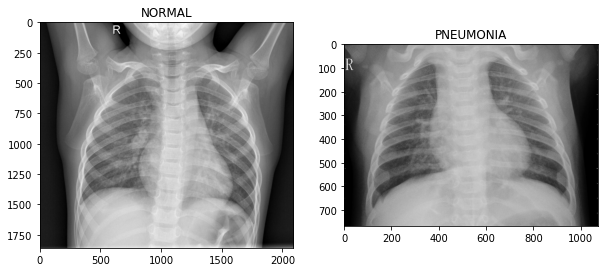

In [4]:
# Quick look to the images 

img_name = 'IM-0115-0001.jpeg'
img_normal = load_img('../DataSet1/chest-xray-pneumonia/chest_xray/train/NORMAL/' + img_name)

img_name_1 = 'person1000_virus_1681.jpeg'
img_pneumonia = load_img('../DataSet1/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/' + img_name_1)

fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].imshow(img_normal)
axs[0].set_title("NORMAL")
axs[1].imshow(img_pneumonia)
axs[1].set_title("PNEUMONIA");
plt.savefig("Examples.png")

In [5]:
img_height, img_width  = 180, 180


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Load the data

In [6]:
# Performing Image Augmentation to have more data samples

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


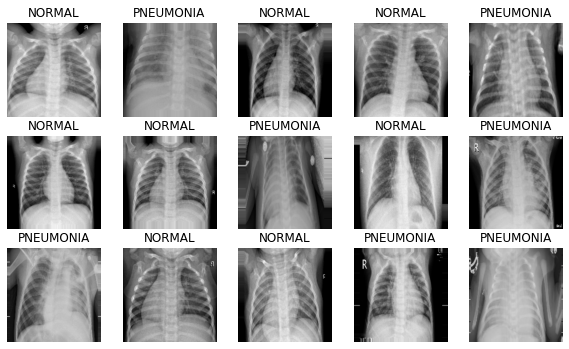

In [7]:
# Show some images after data augmentation

image_batch, label_batch = next(iter(train_generator))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(15):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")
    plt.savefig("Dataset_images.png")

show_batch(image_batch, label_batch)

### Build the CNN

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),  activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0

### Train the model

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [10]:
# Define the callbacks

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

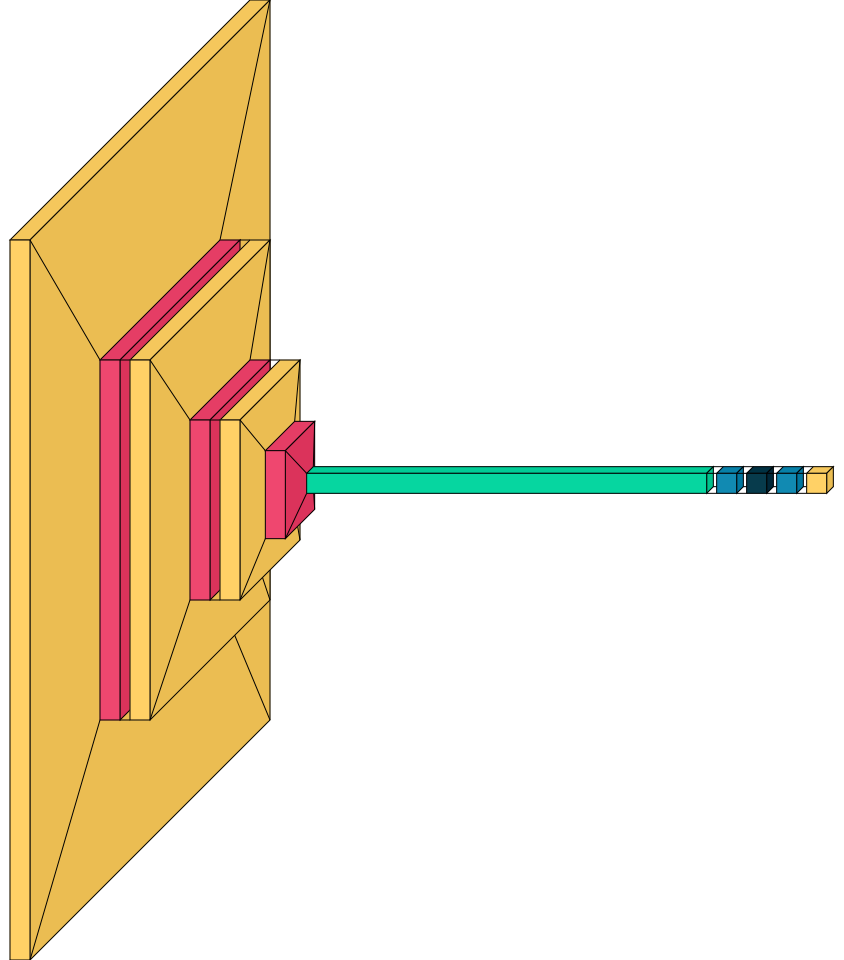

In [11]:
visualkeras.layered_view(model)

### Fit the model

In [12]:
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[early_stopping_cb])

Epoch 1/20
326/326 [==============================] - 89s 271ms/step - loss: 0.6332 - accuracy: 0.7700 - val_loss: 0.8184 - val_accuracy: 0.7500
Epoch 2/20
326/326 [==============================] - 84s 256ms/step - loss: 0.2793 - accuracy: 0.8883 - val_loss: 0.8036 - val_accuracy: 0.6250
Epoch 3/20
326/326 [==============================] - 83s 254ms/step - loss: 0.2349 - accuracy: 0.9094 - val_loss: 0.3079 - val_accuracy: 0.8750
Epoch 4/20
326/326 [==============================] - 83s 255ms/step - loss: 0.2280 - accuracy: 0.9140 - val_loss: 1.2315 - val_accuracy: 0.6250
Epoch 5/20
326/326 [==============================] - 83s 255ms/step - loss: 0.2006 - accuracy: 0.9275 - val_loss: 0.7081 - val_accuracy: 0.7500
Epoch 6/20
326/326 [==============================] - 86s 264ms/step - loss: 0.2181 - accuracy: 0.9291 - val_loss: 0.6672 - val_accuracy: 0.6250
Epoch 7/20
326/326 [==============================] - 83s 254ms/step - loss: 0.2094 - accuracy: 0.9326 - val_loss: 0.9640 - val_ac

### Evaluate the model

In [13]:
scores = model.evaluate_generator(test_generator)

print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

/home/oem/Desarrollo/Master/Homework/arf/covid19_x-ray_images/venv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Loss of the model: 0.30
Test Accuracy: 88.30%


In [14]:
# Saving the model for future use

from keras.models import load_model

model.save('chestxray_cnn_model_3.h5') 

### Make Prediction for a single image

In [45]:
# La instrución: prediction = model.predict(image)
# Se genera la siguiente advertencia:
# WARNING:tensorflow:11 out of the last 11 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f7c9c1e9b70> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop.

def predict_image(filename, name):
    img = load_img(filename, target_size=(img_height, img_width))
    image = keras.preprocessing.image.img_to_array(img)
    image = image / 255.0
    image = image.reshape(1,180,180,3)
    model = load_model('chestxray_cnn_model_3.h5')
    #prediction = model.predict(image)
    prediction = model(image)
    plt.imshow(img)
    plt.savefig(name + ".png")
    if(prediction[0] > 0.5):
        print("predicted: PNEUMONIA")
    else:
        print("predicted: NORMAL")

predicted: NORMAL


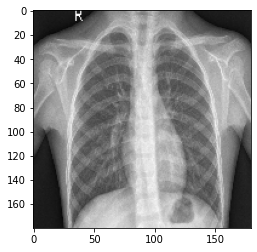

In [46]:
predict_image("../DataSet1/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg", "IM-0001-0001")

predicted: PNEUMONIA


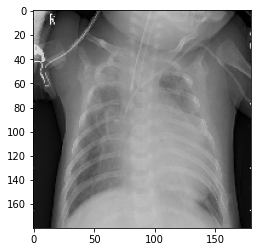

In [47]:
predict_image("../DataSet1/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1_virus_6.jpeg", "person1_virus_6")